In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

In [2]:
#grid
Lx = 2.0
Ly = 2.0
nx = 31
ny = 31
dx = Lx/(nx-1)
dy = Ly/(ny-1)

In [3]:
#diffusion coefficient:
nu = 0.05

#diffusion stability:
sigma = 0.25

#time:
T = 0.5
dt = sigma*dx*dx/nu

In [4]:
#initialize field

u = numpy.ones((ny,nx))
u[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0


In [5]:
x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)

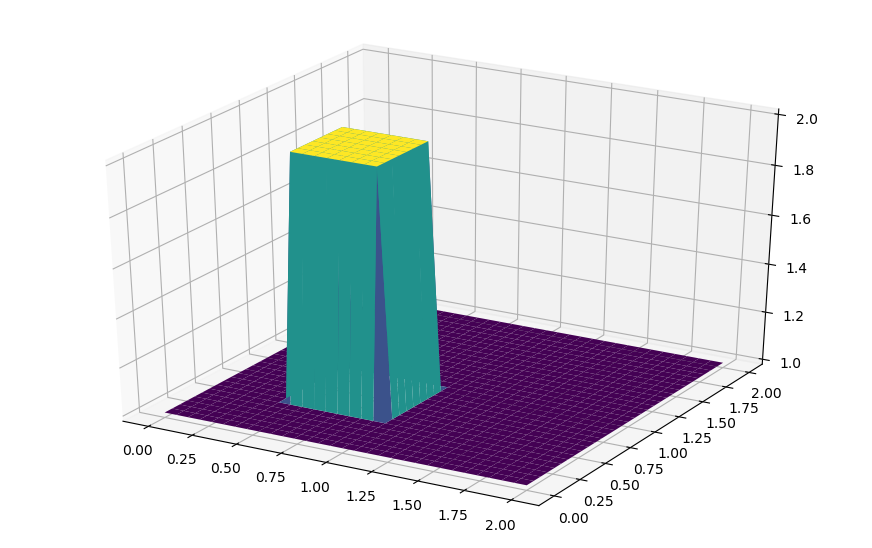

In [6]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [7]:
#Start time loop:
t = 0.0
while t<T:
    t+=dt
    un = u.copy()
    u[1:-1,1:-1] = un[1:-1,1:-1] + (nu*dt/(dx*dx))*(un[1:-1,0:-2] - 2*un[1:-1,1:-1] + un[1:-1,2:] ) +  (nu*dt/(dy*dy))*(un[0:-2,1:-1]  - 2*un[1:-1,1:-1] + un[2:,1:-1]   ) 

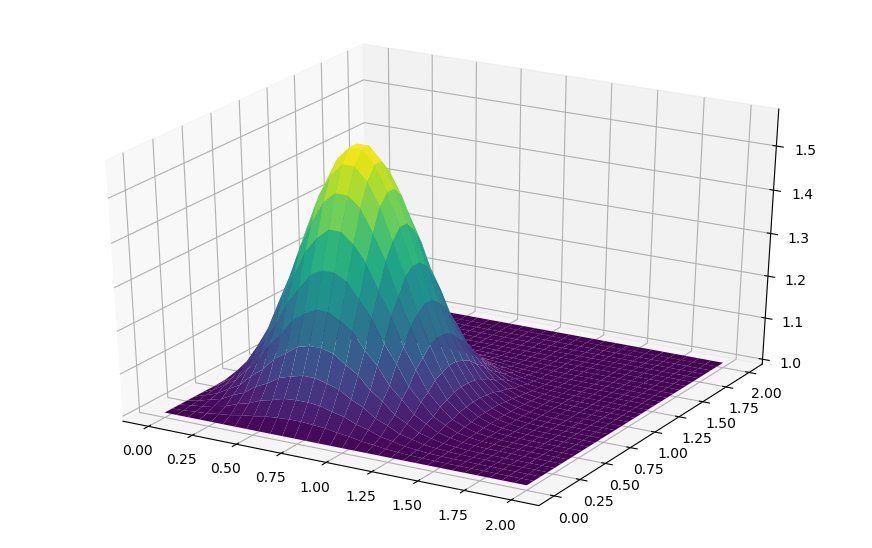

In [8]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

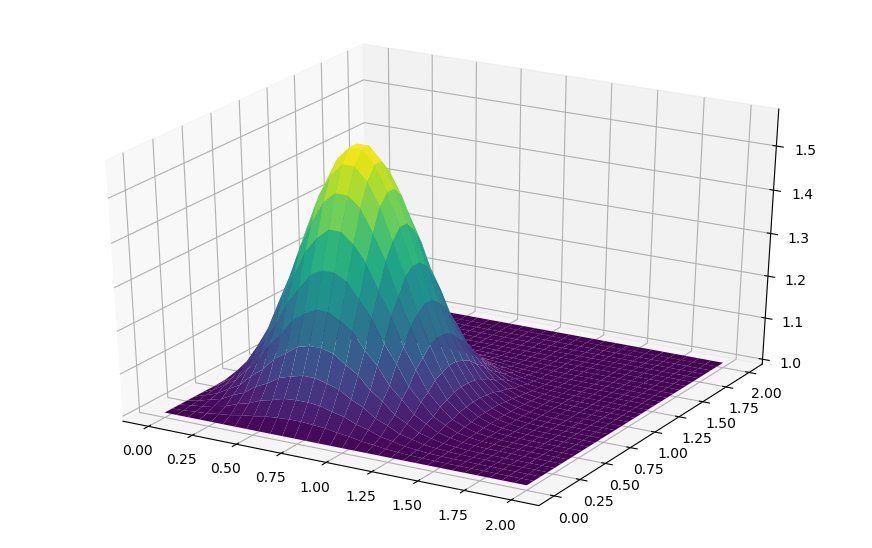

In [9]:
#plot c++ solution
xc = numpy.loadtxt('plot/x.dat')
yc = numpy.loadtxt('plot/y.dat')
uc = numpy.loadtxt('plot/u.dat')

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
Xc, Yc = numpy.meshgrid(xc, yc)                            
surf = ax.plot_surface(Xc, Yc, uc[:], cmap=cm.viridis)


In [10]:
error = u - uc
from numpy import linalg as LA
LA.norm(error)

8.412989077267796e-13